In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import scale,PolynomialFeatures
from sklearn import dummy
from sklearn.svm import SVC

Загрузка данных

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [63]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [69]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset --unzip

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 547kB/s]


In [70]:
%ls

heart.csv  kaggle.json  o2Saturation.csv


In [71]:
pwd

'/content/drive/MyDrive/Kaggle'

Первичное исследование

In [202]:
df=pd.read_csv("heart.csv")

In [203]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [204]:
len(df)

303

In [205]:
df.drop_duplicates(inplace=True)# Удаляем все дубликаты

In [206]:
len(df)# Один дубликат

302

Ищем аномалии

In [81]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd8ffbee90>,
      dtype=object)

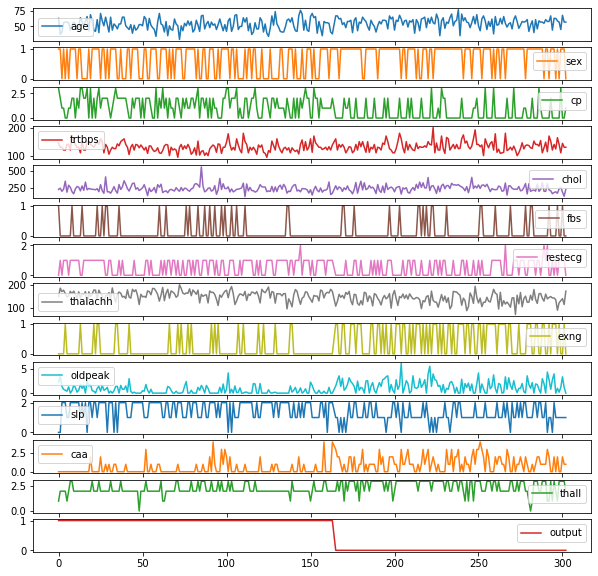

In [82]:
df.plot(subplots=True, figsize = (10, 10))

Аномалий нету

Ищем пропуски

In [83]:
df[df['age']<40]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [84]:
print(len(df))
df.dropna(inplace=True)
print(len(df))

302
302


Пропусков нет

Исследование целей на сбалансированность

In [85]:
df['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

In [86]:
df['output'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: output, dtype: float64

Цели сбалансированы

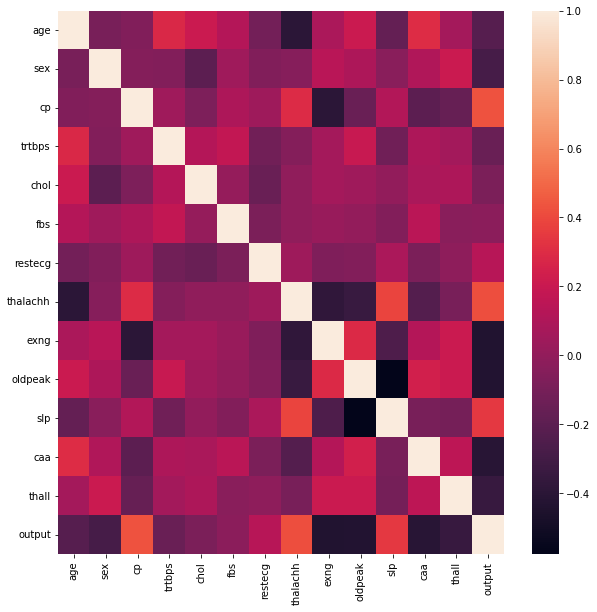

In [87]:
figure(figsize=(10,10))
sns.heatmap(df.corr())

Как видно из корреляцинонной матрицы,возраст скоррелирован с артериальным давением в покое и максимальной частотой линейных сокращений и т.д

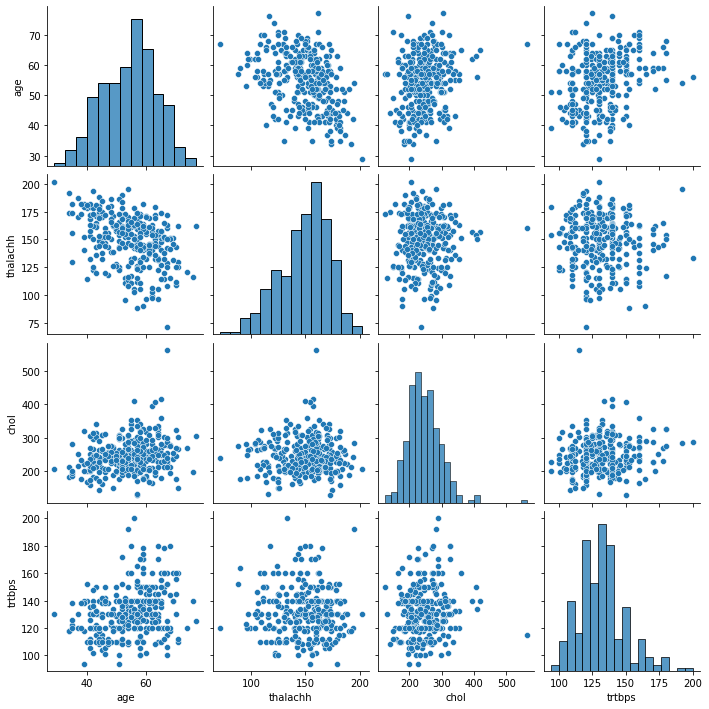

In [88]:
sns.pairplot(df[["age","thalachh","chol","trtbps"]])

In [89]:
df.groupby("output")["age","thalachh",].describe(percentiles=[])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


age                                        thalachh              \
        count       mean       std   min   50%   max    count        mean   
output                                                                      
0       138.0  56.601449  7.962082  35.0  58.0  77.0    138.0  139.101449   
1       164.0  52.585366  9.511957  29.0  52.0  76.0    164.0  158.378049   

                                       
              std   min    50%    max  
output                                 
0       22.598782  71.0  142.0  195.0  
1       19.199080  96.0  161.0  202.0

Люди которые страдают инфарктами моложе, и максимальная частота сердечных сокражений у них выше

Подготовка данных

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 43.5 KB


In [91]:
df[["age","sex"]]=df[["age","sex"]].astype(np.int32)
df.dtypes

age           int32
sex           int32
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Все колонки числовые поэтому нету смысла делать label encoder, потому что это уже и есть label encoder.

In [207]:
df=df.sample(frac=1)

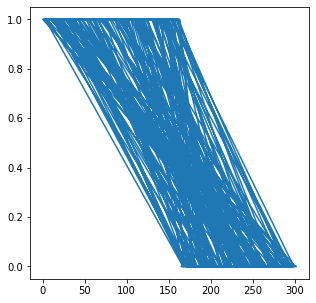

In [208]:
df['output'].plot(figsize = (5, 5))

Перемешал данные, потому что в колонке output сначала шли все единицы, а потом все нули, если бы я так не сделал, то на тестах цели были бы только 0 и был бы дисбаланс на обучении

In [209]:
X=np.array(df.drop(columns=['output']))
y=np.array(df['output'])

Разбиваем данные на тринировочные и тестовые

In [210]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,shuffle=False)

In [211]:
print(f"{y_train.sum()/len(y_train)} доля единиц в train")
print(f"{y_test.sum()/len(y_test)} доля единиц в test")

0.5352697095435685 доля единиц в train
0.5737704918032787 доля единиц в test


Данные после train test split сбалансированны

In [212]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train=(X_train-mean)/std #Нормализация данных
X_test=(X_test-mean)/std

In [213]:
X_train.shape

(241, 13)

In [214]:
y_train.shape

(241,)

Строим прогнозы на dummy класификаторе


In [215]:
knn_dum=dummy.DummyClassifier().fit(X_train,y_train)
y_hat_dum=knn_dum.predict(X_test)

In [216]:
metrics.accuracy_score(y_test,y_hat_dum)

0.5737704918032787

Строим прогнозы на KNN класификаторе

In [217]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_hat_knn=knn.predict(X_test)

In [218]:
metrics.accuracy_score(y_test,y_hat_knn) 

0.819672131147541

Как видно из оценки классификатор достаточно неплохо справился со своей задачей, однако нужно посмотреть и на другие метрики

Подбираем гиперпараметры

In [223]:
knn=KNeighborsClassifier()
params={
    "n_neighbors":np.array(np.linspace(25, 40, 15),dtype='int'),
    "metric":["euclidean","manhattan","chebyshev","minkowski"],
    "weights":["uniform", "distance"]
}
gs=GridSearchCV(knn,params,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40]),
                         'weights': ['uniform', 'distance']})

In [224]:
gs.best_params_,gs.best_score_

({'metric': 'manhattan', 'n_neighbors': 33, 'weights': 'uniform'}, 0.8385)

С помощью настройки гиперпараметров мы получили точность на 2% выше чем без нее. Лучшие оценки достигаются при расчете растояние методом Манхетана и 33 соседей

In [225]:
y_gs=gs.predict(X_test)

In [226]:
print(metrics.classification_report(y_test,y_gs))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.82      0.94      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.84        61
weighted avg       0.86      0.85      0.85        61



Как видно из оценок для 1 recall 0.94 это означает что алгоритм хорошо определяет сердечный приступ, это самый важный для нас параметр так как это означает, что классификатор не пропускает 1,то есть FN = 0.Даже не смотря на то, что precision 0.82, классификатор хорошо классифицирует. F-1 score тоже высокий 0.85 это означает что алгоритм работает хорошо

In [227]:
print(metrics.confusion_matrix(y_test,y_gs))

[[19  7]
 [ 2 33]]


In [228]:
metrics.roc_auc_score(y_test,y_gs)

0.8368131868131868

ROC AUC = 0.8368


Text(0.5, 0, 'False Positive Rate')

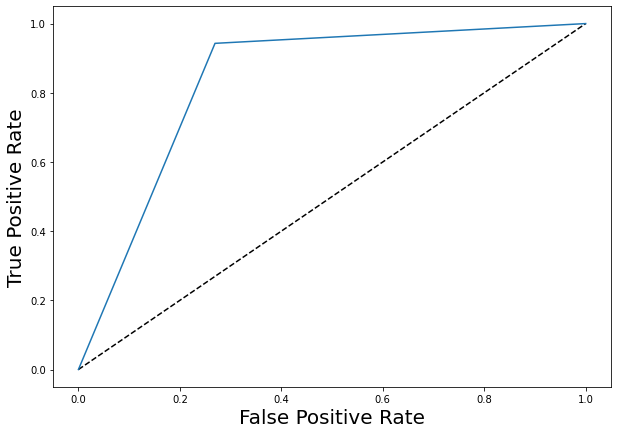

In [229]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_gs)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Площадь под кривой 0.8368. Алгоритм работает хорошо

Закодируем данные с помощью one-hot-encoder

In [230]:
categorical_columns=["sex","cp","fbs","restecg"]

In [231]:
df_one_hot=df.copy()

In [233]:
for categorical_column in categorical_columns:
    df_one_hot[[categorical_column]]=df_one_hot[[categorical_column]].astype(np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [234]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 270 to 112
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 35.4+ KB


In [235]:
df_one_hot=pd.get_dummies(df_one_hot,columns=categorical_columns)

In [236]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 270 to 112
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   trtbps     302 non-null    int64  
 2   chol       302 non-null    int64  
 3   thalachh   302 non-null    int64  
 4   exng       302 non-null    int64  
 5   oldpeak    302 non-null    float64
 6   slp        302 non-null    int64  
 7   caa        302 non-null    int64  
 8   thall      302 non-null    int64  
 9   output     302 non-null    int64  
 10  sex_0      302 non-null    uint8  
 11  sex_1      302 non-null    uint8  
 12  cp_0       302 non-null    uint8  
 13  cp_1       302 non-null    uint8  
 14  cp_2       302 non-null    uint8  
 15  cp_3       302 non-null    uint8  
 16  fbs_0      302 non-null    uint8  
 17  fbs_1      302 non-null    uint8  
 18  restecg_0  302 non-null    uint8  
 19  restecg_1  302 non-null    uint8  
 20  restecg_

In [237]:
for column in df_one_hot.columns:
    if column!="oldpeak":
        df_one_hot[[column]]=df_one_hot[[column]].astype(np.int32)

In [238]:
df_one_hot.shape

(302, 21)

In [239]:
X_one_hot=np.array(df_one_hot.drop(columns=['output']))
y_one_hot=np.array(df_one_hot['output'])

In [240]:
mean=X_one_hot.mean(axis=0)
std=X_one_hot.std(axis=0)
X_one_hot=(X_one_hot-mean)/std #Нормализация данных

In [241]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_one_hot,y_one_hot,test_size=0.2,shuffle=False)

In [243]:
knn=KNeighborsClassifier()
params={
    "n_neighbors":np.array(np.linspace(25, 55, 15),dtype='int'),
    "metric":["euclidean","manhattan","chebyshev","minkowski"],
    "weights":["uniform", "distance"]
}
gs_one_hot=GridSearchCV(knn,params,cv=10)
gs_one_hot.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([25, 27, 29, 31, 33, 35, 37, 40, 42, 44, 46, 48, 50, 52, 55]),
                         'weights': ['uniform', 'distance']})

In [244]:
gs_one_hot.best_params_,gs_one_hot.best_score_

({'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'distance'},
 0.8546666666666667)

По сравнению с label encoder, one-hot-encoder имеет чуть лучше точность.Так же для лучших алгоритмов гиперпараметры отличаются,а именно weight и n_neighbors

In [245]:
y_gs_one_hot=gs_one_hot.predict(X_test)

In [246]:
print(metrics.classification_report(y_test,y_gs_one_hot))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.80      0.91      0.85        35

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



Для 1 recall на 3% хуже чем для labal encoder. Это значит, что алгоритм чуть хуже может выделять этот класс, а это очень важный признак в нашем конкретном случае. F-1 score также ниже на 3%

In [247]:
metrics.roc_auc_score(y_test,y_gs_one_hot)

0.8032967032967033

ROC AUC = 0.8033


Text(0.5, 0, 'False Positive Rate')

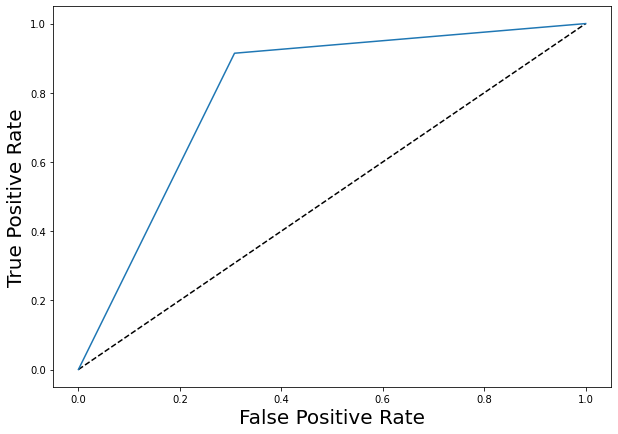

In [248]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_gs_one_hot)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

F1-score и auc-roc на 3% хуже у one hot encoder, чем у label encoder. 

Преобразование данных с помощью полиномов

In [251]:
X_poly=X.copy()
poly=PolynomialFeatures(2)
X_poly=poly.fit_transform(X_poly)

In [252]:
X_poly=X_poly[:,1:]

In [254]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_poly,y,test_size=0.2,shuffle=False)

In [255]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train=(X_train-mean)/std #Нормализация данных
X_test=(X_test-mean)/std

In [260]:
knn=KNeighborsClassifier()
params={
    "n_neighbors":np.array(np.linspace(25, 40, 15),dtype='int'),
    "metric":["euclidean","manhattan","chebyshev","minkowski"],
    "weights":["uniform", "distance"]
}
gs_poly=GridSearchCV(knn,params,cv=10)
gs_poly.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40]),
                         'weights': ['uniform', 'distance']})

In [261]:
gs_poly.best_params_,gs_poly.best_score_

({'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'distance'},
 0.8508333333333333)

In [262]:
y_gs_poly=gs_poly.predict(X_test)

In [263]:
print(metrics.classification_report(y_test,y_gs_one_hot))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.80      0.91      0.85        35

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



Как видно из оценок для 1 recall 0.91 это означает что алгоритм хорошо определяет сердечный приступ, лучше чем one-hot, но хуже чем label encoder. F-1 score также как и у one-hot.

In [265]:
metrics.roc_auc_score(y_test,y_gs_poly)

0.7983516483516483

После преобразования данных с помощью полинома второго порядка auc-roc ниже на 1% и на 4% соответственно чем у one-hot и label encoder

Решение задачи классификации с помощью SVM алгоритма.

In [268]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,shuffle=False)

In [269]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train=(X_train-mean)/std #Нормализация данных
X_test=(X_test-mean)/std

In [270]:
slf=SVC()
params={
    "kernel":["linear", "poly", "rbf", "sigmoid"],
    "degree":[2,3],
    "C":np.array(np.linspace(1, 5, 5),dtype='int')
}
gs_clf=GridSearchCV(slf,params,cv=10)
gs_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5]), 'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [271]:
gs_clf.best_params_,gs_clf.best_score_

({'C': 1, 'degree': 2, 'kernel': 'rbf'}, 0.8300000000000001)

In [272]:
y_gs_clf=gs_clf.predict(X_test)

In [273]:
print(metrics.classification_report(y_test,y_gs_clf))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.80      0.91      0.85        35

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [274]:
metrics.roc_auc_score(y_test,y_gs_clf)

0.8032967032967033

Результаты работы SVM алгоритма также показали хорошие результаты и практически не отличаются от других алгоритмов.